# Applied Data Visualization Lecture 10: Tabular Data in Seaborn

We have seen Seaborn before, but now we want to look at it for plotting higher-level tabular data, and understand a bit of the underlying design philosophy. 

Seaborn is based on Matplotlib, but much higher level. 

For example, it does do a lot of data transformation and aggregation, and even statistics for you, that you might have to do by hand in Matplotlib. 





In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')
import seaborn as sns




## Distributions


Let's first look at some variations of histograms and KDE plots for the Penguin dataset. 

In [90]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


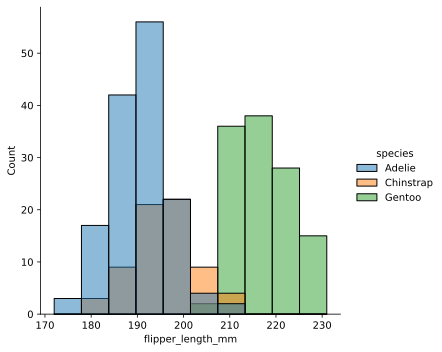

In [91]:


sns.displot(df, x="flipper_length_mm", hue="species", kind="hist", fill=True)

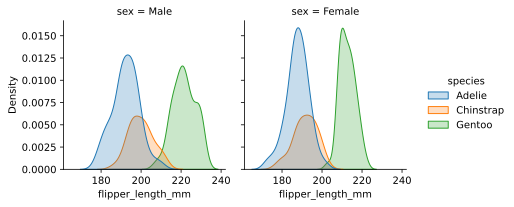

In [92]:
sns.displot(df, x="flipper_length_mm",col="sex", hue="species", kind="kde", fill=True, height=3)

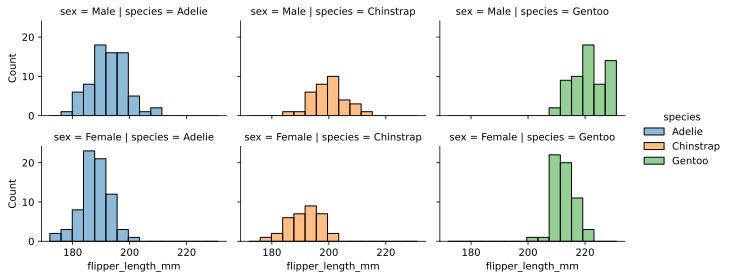

In [93]:
sns.displot(df, x="flipper_length_mm",row="sex", col="species", hue="species", kind="hist", fill=True, height=2, aspect=1.5, bins=15)

In [94]:
df[["bill_depth_mm", "flipper_length_mm"]] 

,bill_depth_mm,flipper_length_mm
0,18.7,181.0
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
5,20.6,190.0
...,...,...
338,13.7,214.0
340,14.3,215.0
341,15.7,222.0
342,14.8,212.0


Plotting a violin plot following the principle of cloud - rain - lightning is a bit tricky. The standard point feature isn't what he hope it is because of overplotting: 

<Axes: xlabel='flipper_length_mm', ylabel='species'>

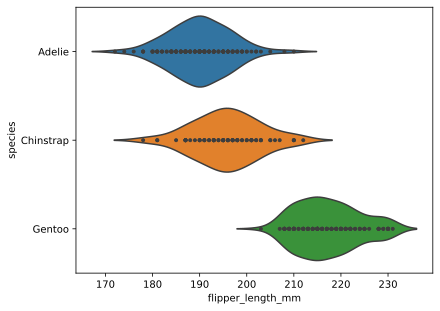

In [95]:
sns.violinplot(df, x="flipper_length_mm", y="species", inner="point", orient="h")

So what we can do is combine it with a strip plot: 

matplotlib.axes._axes.Axes

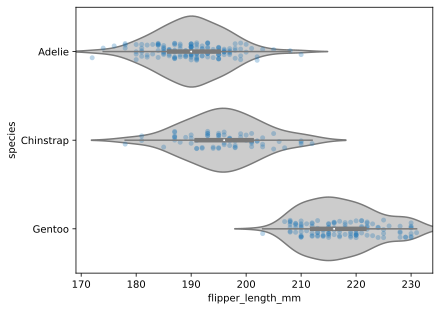

In [118]:
ax = sns.violinplot(df, x="flipper_length_mm", y="species", orient="h", color="0.8")
sns.stripplot(df,x="flipper_length_mm", y="species", jitter=True, zorder=1, alpha=0.3)


We can also do a beeswarm/swarm plot, and then also color the dots by sex. 

<Axes: xlabel='flipper_length_mm', ylabel='species'>

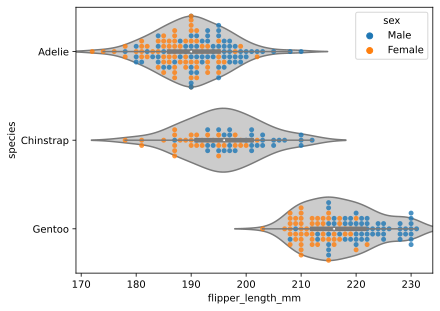

In [97]:
sns.violinplot(df, x="flipper_length_mm", y="species", orient="h", color="0.8")
sns.swarmplot(df,x="flipper_length_mm", y="species", zorder=1, alpha=0.8, hue="sex")

If we want to take a closer look at the sex differences, we can split both the violin plot and the swarm plot by sex. 

<Axes: xlabel='flipper_length_mm', ylabel='species'>

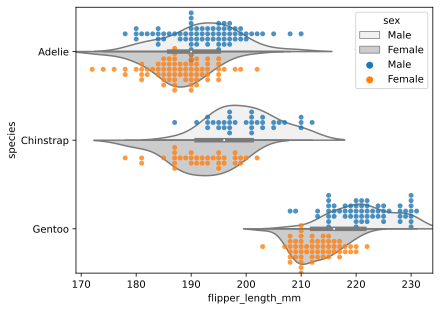

In [98]:
sns.violinplot(df, x="flipper_length_mm", y="species", orient="h", color="0.8", hue="sex", split=True)  
sns.swarmplot(df,x="flipper_length_mm", y="species", zorder=1, alpha=0.8, hue="sex", dodge=True)

Seaborn also allows us to plot an **empirical cumulative distribution function**:

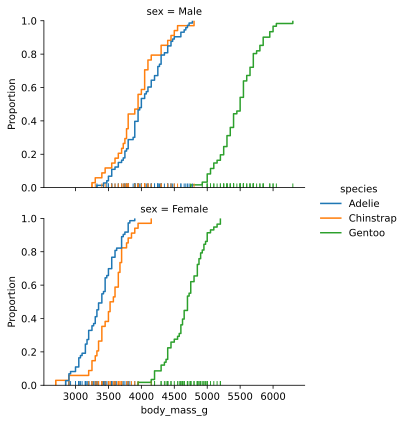

In [99]:
sns.displot(df, kind="ecdf", x="body_mass_g", hue="species", rug=True, row="sex", height=3, aspect=1.5)


## Correlations

If we look at correlations, we can use a scatterplot. We can first look at the bill depth vs lenght data for our pinguins. Notice that you don't really seem to see a trend: 

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

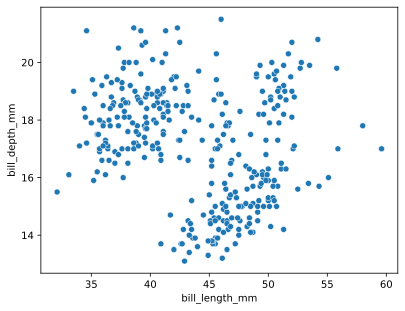

In [100]:
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm")

But if we facet by species, something emerges: 

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

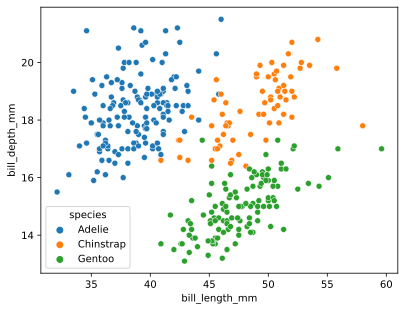

In [101]:
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species")

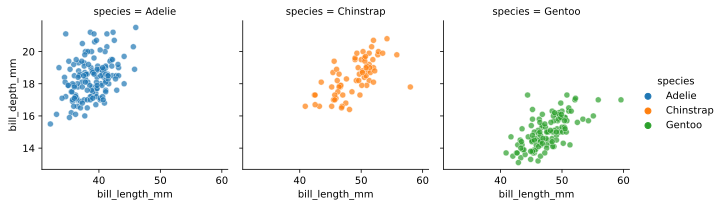

In [102]:
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm", col="species", hue="species", alpha=0.7, height=3, aspect=1)

We can also look at a regression model for this dataset using lmplot. 

Again, this doesn't look very convincing for the combined dataset, but looks much better when we separate out the species. 

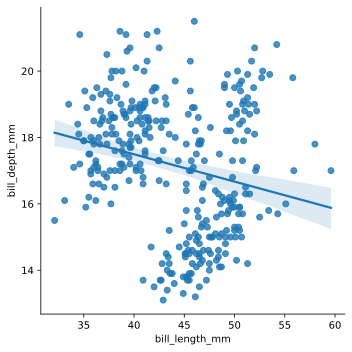

In [103]:
sns.lmplot(df, x="bill_length_mm", y="bill_depth_mm")

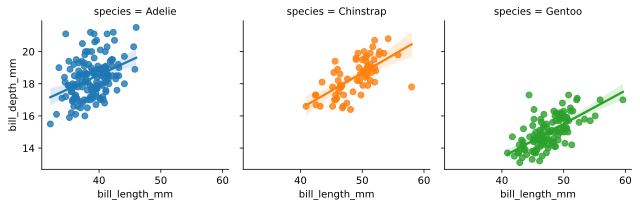

In [104]:
sns.lmplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species", col="species", height=3, aspect=1)

If overplotting becomes an issue, we can use a hexbin plot. This plot aggregates points into exagons, so shows the "density" of the scatterplot. This way it doesn't matter if you have thousands of points. We can create a hexbin plot with a jointplot: 

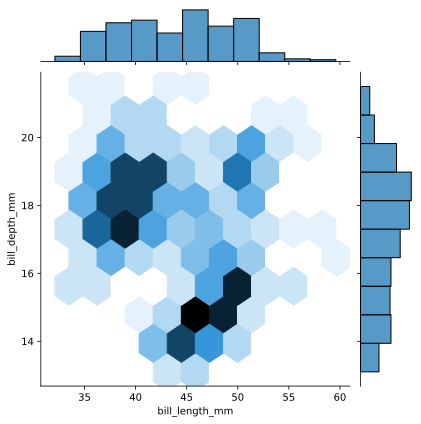

In [116]:
sns.jointplot(df, x="bill_length_mm", y="bill_depth_mm", kind="hex")

## Higher-Dimensional Visualziation

In addition to the scatterplot matrix, which we've already covered, the other major high-dimensional visualization techniques are parallel cooridnates and heat maps. Seaborn doesn't support PCPs, but we can check out a cluster heat map:  

{'Adelie': (0.8167028311697733, 0.5345122109266688, 0.5750280113923723), 'Chinstrap': (0.47974942417114835, 0.6571819677589695, 0.44834696208654984), 'Gentoo': (0.4876882343131805, 0.6244361983159378, 0.7739392861631831)}


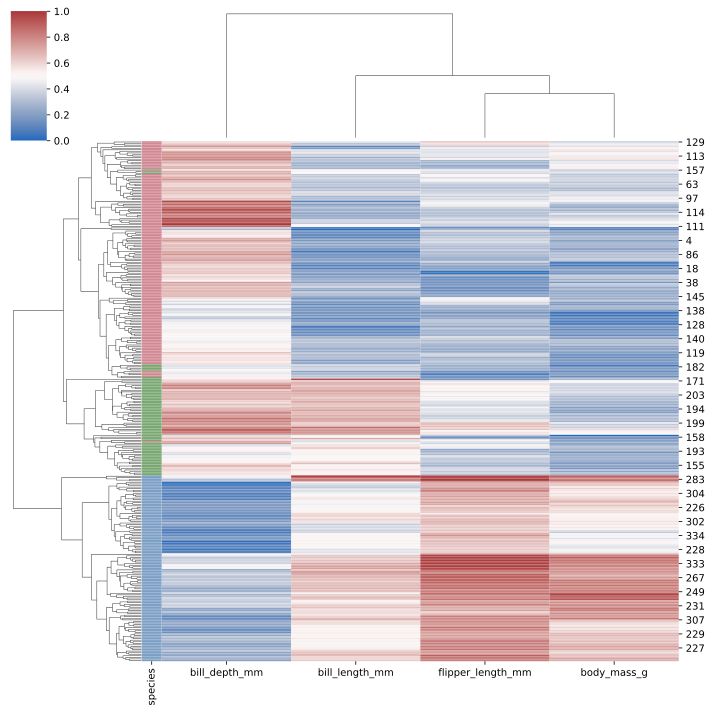

In [112]:
species = df["species"]
colors=sns.husl_palette(3, s=.45)
lut = dict(zip(species.unique(), colors))
print(lut)
row_colors = species.map(lut)

sns.clustermap(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], cmap="vlag", standard_scale=1, row_colors=row_colors)

## Figure vs Axes Level Functions

Seaborn either operates on the matplotlib axes level, or on the figure level. For example, we can create a KDE plot in two different ways: 



matplotlib.axes._axes.Axes

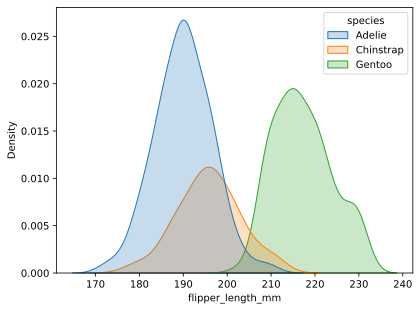

In [128]:
# this works on the axes level
ax = sns.kdeplot(df, x="flipper_length_mm", hue="species", fill=True)
type(ax)

seaborn.axisgrid.FacetGrid

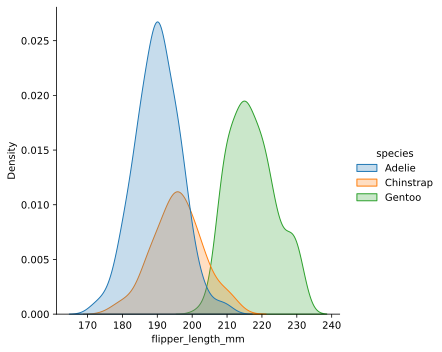

In [134]:
# this creates a generic displot and I can pass the "kind" argument into it for a KDE
f = sns.displot(df, x="flipper_length_mm", hue="species", kind="kde", fill=True)
type(f)

Note that they are different in that they draw the legend inside the figure for axes, and not for figures. 

We can explicitly creat multi-panle figures using the familiar matplotlib approach: 

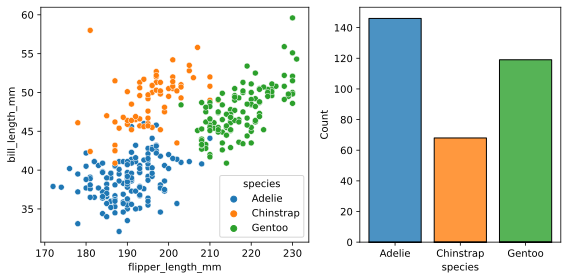

In [119]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(df, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(df, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()